# Relationships

For all the relationship tests performed here, we assume that all the test assumptions are met.

[Pearson's Correlation Coefficient](#p)&nbsp; &nbsp;[Kendall's Tau](#k)&nbsp; &nbsp;[Chi-squared](#c)&nbsp; &nbsp;[Student's T-Test](#t)&nbsp; &nbsp;[z-test](#z)&nbsp; &nbsp;[ANOVA](#a)

Various tests for relationships between variables can be found in the **SciPy** package, which we will import under the short name **sp**.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss

## <a id="p">Pearson's Correlation Coefficient</a>

This measure of relatedness between two variables can be used when the variables are both **normally distributed** (which implies that they are both numeric). 

Assuming that both the latitude and longitude variables in the magnetic pole data are normally distributed, we look at whether there is a correlation between the two using Pearson's Correlation Coefficient.

In [2]:
# Get the pole data
mag_pole_data = pd.read_csv("polar.csv", index_col=0)
# Print the first 5 rows of the data frame
print(mag_pole_data.head(5))

    lat   long
1 -26.4  324.0
2 -32.2  163.7
3 -73.1   51.9
4 -80.2  140.5
5 -71.1  267.2


In [3]:
# Get the correlation coefficient and p-value (the function returns two values)
r, p = ss.pearsonr(mag_pole_data["lat"], mag_pole_data["long"])
print("r = " + str(r))
print("p = " + str(p))

r = -0.0021438009514379817
p = 0.9882112420591266


**Interpretation:** The calculated Pearson's Correlation Coefficient is low (0.002), indicating no correlation. The two-tailed p-value is very close to 1 (0.99), meaning that a higher absolute coefficient value would be obtained for in 99% of cases for entirely unrelated variables with the same parameters as ours.  

## <a id="k">Kendall's Tau</a>

This measure of relatedness between two variables is a **rank** correlation coefficient, meaning that it can be used on variables with values that can be **ranked**, including any numeric or ordinal variables, regardless of their distribution.

We look at three different ways of passing data to the Kendall's Tau method.

### 1

Let us look at an example of a competition where judges rate competitors based on their performance. Let's say that the competitors are labelled A, B, C, D, E, F and G. We would like to see if there is a correlation between the ratings by two judges J1 and J2.

In [4]:
# Create lists of competitors ordered by rating, one for each judge
J1Ranked = ["A", "C", "B", "F", "D", "E", "G"]
J2Ranked = ["A", "B", "C", "F", "E", "D", "G"]

In [6]:
# Apply the Kendall Tau test to the listsabs
tau, p = ss.kendalltau(J1Ranked, J2Ranked)
print("tau = " + str(tau))
print("p = " + str(p))

tau = 0.8095238095238096
p = 0.010714285714285714


### 2

J1Ranked and J2Ranked are in fact lists of instances, arranged by rank (as assigned by the judges). More commonly, we will not have the data in this form, but will have the rankings by the two judges as two columns of data in our dataframe. In the following cell we create rankings from the ranked items and re-run Kendall's Tau. The result should be the same.

In [14]:
J1Rankings = [J1Ranked.index(x) for x in 'ABCDEFG']
J2Rankings = [J2Ranked.index(x) for x in 'ABCDEFG']
J1Rankings, J2Rankings

([0, 2, 1, 4, 5, 3, 6], [0, 1, 2, 5, 4, 3, 6])

In [15]:
# Apply the Kendall Tau test to the listsabs
tau, p = ss.kendalltau(J1Rankings, J2Rankings)
print("tau = " + str(tau))
print("p = " + str(p))

tau = 0.8095238095238096
p = 0.010714285714285714


### 3

Finally, instead of ranks we may have some numeric value, e.g. marks out of 100. Let's create some such data, preserving the rankings of the competitors.

On code below:
- with `random.sample(range(101), 7)` we get a **list** seven random numbers between 0 and 100
- calling `sorted()` on that list, with argument `reverse=True`, we get a **list** with those 7 numbers in descending order
- calling `np.array()` on that list, we turn it into a **numpy array**, which can be indexed more easily
- with `[J1Rankings]` we index the numpy array to rearrange the numbers based on the ranks, the top rank (0) getting the highest mark etc.

Kendall's Tau, run on this data, gives the same result again, as the order is preserved.

In [38]:
import random
J1Marks = np.array(sorted(random.sample(range(101), 7), reverse=True))[J1Rankings]
J2Marks = np.array(sorted(random.sample(range(101), 7), reverse=True))[J2Rankings]

In [39]:
# Apply the Kendall Tau test to the listsabs
tau, p = ss.kendalltau(J1Marks, J2Marks)
print("tau = " + str(tau))
print("p = " + str(p))

tau = 0.8095238095238096
p = 0.010714285714285714


**Interpretation:** The calculated Kendall's Tau is high (0.81), indicating a positive correlation. The two-tailed p-value is approximately 0.01, meaning that in about 1% of cases this Tau value would be obtained for entirely unrelated sequences of the same length as ours (7). Now it is up to us to decide whether this gives us enough certainty in our particular scenario.  

## <a id="c">Chi-squared</a>

The chi-squared statistic can measure the relatedness between two categorical variables. It is applied to a table of values, containing instance counts for all possible combinations of values for the two variables. 

Another application (not presented here) of the chi-squared statistic is to investigate the goodnes-of-fit of observed frequencies of a set of outcomes against the expected frequencies. Testing dice for fairness is an example of this: the expected frequency of each of the six outcomes is exactly 1/6, but a 'loaded' die would have an unexpectedly high differences between the outcome frequencies, which can be statistically quantified using the chi-squared test.

### Example with ready data frame

In [6]:
# Numbers of patients with no, partial and full recovery for each of the 4 treatments
none = [20, 32, 8, 52]
partial = [9, 72, 8, 32] 
full = [16, 64, 30, 12] 

skin_treatment_df = pd.DataFrame({'None':none, 'Partial':partial, 'Full':full})
skin_treatment_df.index = ["Injection", "Tablet", "Laser", "Herbal"]

# Print the data frame representing the table of counts for each combination of treatment and 
# level of improvement (e.g. the number of patients that were treated with tablets and improved
# partially was 72).
print(skin_treatment_df)

           None  Partial  Full
Injection    20        9    16
Tablet       32       72    64
Laser         8        8    30
Herbal       52       32    12


In [7]:
# Apply the Chi-squared test to the data
chisq, p, dof, evs = ss.chi2_contingency(skin_treatment_df)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 66.16615112075414
p = 2.492436462625812e-12
degrees of freedom = 6
expected value table: 
[[14.1971831  15.33802817 15.46478873]
 [53.0028169  57.26197183 57.73521127]
 [14.51267606 15.67887324 15.8084507 ]
 [30.28732394 32.72112676 32.9915493 ]]


**Interpretation:** The Chi-squared statistic is 66.17 and for degrees of freedom equal to 6 this equates to a p-value of 2.49 * 10^12. This p-value indicates that it is practically impossible for a Chi-squared value like ours, or greater, to be obtained when two variables with 6 degrees of freedom are entirely unrelated. This means high certainty that there is a relationship between the type of treatment and outcome for the patient.

### Example with contingency table

In [8]:
# Read in some data about commuting in Ireland
irl_trans = pd.read_csv("ireland_transport.csv")
irl_trans

Group     Sex  \
0   Children at school aged between 5 and 12 years    Male   
1   Children at school aged between 5 and 12 years    Male   
2   Children at school aged between 5 and 12 years    Male   
3   Children at school aged between 5 and 12 years    Male   
4   Children at school aged between 5 and 12 years    Male   
..                                             ...     ...   
75       Population aged 15 years and over at work  Female   
76       Population aged 15 years and over at work  Female   
77       Population aged 15 years and over at work  Female   
78       Population aged 15 years and over at work  Female   
79       Population aged 15 years and over at work  Female   

                                Mode    1986    1991    1996    2001    2006  \
0                            On foot  129973  107125   79164   57570   55799   
1                            Bicycle   14507   14203    7837    3640    3043   
2              Bus, minibus or coach   52928   55474   51008   38590   34413   
3                Train, DART or LUAS     325     438     306     262     328   
4              Motorcycle or scooter       0       0       0       0       0   
..                               ...     ...     ...     ...     ...     ...   
75                 Motor car: Driver   94152  138955  221207  387164  500412   
76              Motor car: Passenger   55105   57932   66913   55677   49828   
77  Other means (incl. lorry or van)    2212    4257    3296    3277    3502   
78       Work mainly at or from home   26942   36126   30836   24855   36445   
79                        Not stated   20523   16708   13849    9071    9622   

      2011    2016  
0    59986   64764  
1     4457    4858  
2    31217   29410  
3      371     383  
4        0       0  
..     ...     ...  
75  551638  590927  
76   43346   43984  
77    3187    3101  
78   24048   29347  
79   28193   41070  

[80 rows x 10 columns]

In [9]:
# Create a contingency table
grp_vs_gen_tab = pd.crosstab(irl_trans["Group"], irl_trans["Sex"], values=irl_trans["2016"], aggfunc=np.sum )
grp_vs_gen_tab

Sex                                                 Female     Male
Group                                                              
Children at school aged between 5 and 12 years      267251   279665
Population aged 15 years and over at work           913163  1057565
Students at school or college aged 19 years and...   98309    92486
Students at school or college aged between 13 a...  172315   177853

In [10]:

# Apply the Chi-squared test to the contingency table
chisq, p, dof, evs = ss.chi2_contingency(grp_vs_gen_tab)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 3125.270216784954
p = 0.0
degrees of freedom = 3
expected value table: 
[[ 259463.18007119  287452.81992881]
 [ 934935.81086553 1035792.18913447]
 [  90515.32125899  100279.67874101]
 [ 166123.68780428  184044.31219572]]


**Interpretation:** The Chi-squared statistic is high and the p-value equal to 0, indicating that there is a relationship between the gender and group variables. This means that the sexes are not evenly represented across the groups in the sample.

### Chi-squared test on data fixed to match expected values

In [11]:
# Make some perfectly distributed data
col1 = [1111, 2222, 3333, 4444]
col2 = [2222, 4444, 6666, 8888]
col3 = [3333, 6666, 9999, 13332]
tab = pd.DataFrame({'one':col1, 'two':col2, 'three':col3})
tab

one   two  three
0  1111  2222   3333
1  2222  4444   6666
2  3333  6666   9999
3  4444  8888  13332

In [12]:
# Apply the Chi-squared test to the 'fixed' data
chisq, p, dof, evs = ss.chi2_contingency(tab)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 0.0
p = 1.0
degrees of freedom = 6
expected value table: 
[[ 1111.  2222.  3333.]
 [ 2222.  4444.  6666.]
 [ 3333.  6666.  9999.]
 [ 4444.  8888. 13332.]]


**Interpretation:** The Chi-squared statistic is 0 and the p-value 1. This indicates a perfect randomness and lack of relationship between the column and row variables. However, a result like this in a real scenario would be 'too good to be true' and may indicate data fixing.

## <a id="t">Student's T-Test</a>

The t-test is used to test whether two samples belong to the same population. It uses the t-statistic devised by William Sealy Gosset, which depends on the standard deviations of the samples and their means (making this a **parametric** test).

Another way to view the test is as a test for a relationship between a numeric variable and a categorical one (the categorical variable's two values being membership of one or the other group).

We will apply the t-test to the *iris* data set portions for two species. 

### Testing samples that are known to be from different populations

In [81]:
# Import the iris dataset, then create subsets for each flower species
import pandas as pd
irisdf = pd.read_csv("iris.csv", index_col=0)

In [82]:
setosadf = irisdf[irisdf["Species"]=="setosa"]
print(setosadf.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [83]:
virginicadf = irisdf[irisdf["Species"]=="virginica"]
print(virginicadf.head(3))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
101           6.3          3.3           6.0          2.5  virginica
102           5.8          2.7           5.1          1.9  virginica
103           7.1          3.0           5.9          2.1  virginica


In [84]:
versicolordf = irisdf[irisdf["Species"]=="versicolor"]
print(versicolordf.head(3))

    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
51           7.0          3.2           4.7          1.4  versicolor
52           6.4          3.2           4.5          1.5  versicolor
53           6.9          3.1           4.9          1.5  versicolor


In [85]:
import scipy.stats as sps
# Define a function that runs the t-test between sections of the iris dataset and prints results
def runtt(d1, d2, attrib, title) :
    t, p = sps.ttest_ind(d1[attrib], d2[attrib])
    print(title + "\nt-statistic: " + str(t) + "\np-value: " + str(p) + "\n\n")

# Run the t-test for the petal length between pairs of samples
runtt(setosadf, versicolordf, "Petal.Length", "setosa, versicolor")
runtt(setosadf, virginicadf, "Petal.Length", "setosa, virginica")
runtt(versicolordf, virginicadf, "Petal.Length", "versicolor, virginica")

setosa, versicolor
t-statistic: -39.492719391538095
p-value: 5.404910513441677e-62


setosa, virginica
t-statistic: -49.98618625709594
p-value: 1.5048006992427275e-71


versicolor, virginica
t-statistic: -12.603779441384985
p-value: 3.1788195478061495e-22




**What do these results tell us?** The p-values are very low in all cases, which means that in all cases the calculated t-statistic has a value that is extremely unlikely in the case of two unbiased samples from the same population. The conclusion is that each pair of samples, given their size and distribution come from different populations (which we know to be true as they come from data for different flower species). It is worth noting that while it is statistically almost certain that the samples are from different populations, it is even 'more certain' when it comes to virginica as opposed to the other two species.

### Testing two samples known to be from the same population

In [86]:
# Let's create a list of 25 random indices between 0 and 49 (inclusive), to use for sampling our setosa set
# the complement of the list is also created
import random
inds25of50_1 = np.array(sorted(random.sample(range(50), 25)))
inds25of50_2 = np.array(range(50))[~np.isin(range(50),inds25of50_1)]
inds25of50_1, inds25of50_2

(array([ 0,  1,  3,  4,  6,  7,  8, 14, 15, 16, 18, 25, 26, 27, 29, 31, 33,
        35, 40, 41, 42, 44, 45, 46, 47]),
 array([ 2,  5,  9, 10, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 28, 30, 32,
        34, 36, 37, 38, 39, 43, 48, 49]))

In [87]:
# Now let's subset our setosa dataframe with the two index lists (note that the index lists are 0-based, while the line numbers in the set are labelled starting with 1)
setosadf_ss1 = setosadf.iloc[inds25of50_1]
setosadf_ss2 = setosadf.iloc[inds25of50_2]
print(setosadf_ss1.head(5))
print(setosadf_ss2.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa
7           4.6          3.4           1.4          0.3  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
3            4.7          3.2           1.3          0.2  setosa
6            5.4          3.9           1.7          0.4  setosa
10           4.9          3.1           1.5          0.1  setosa
11           5.4          3.7           1.5          0.2  setosa
12           4.8          3.4           1.6          0.2  setosa


In [88]:
# We can now run the t-test by calling our function
runtt(setosadf_ss1, setosadf_ss2, "Petal.Length", "setosa, two subsets")

setosa, two subsets
t-statistic: -0.4036767466756379
p-value: 0.6882432333802206




**What do these results tell us?** For two unbiased samples from the same population, the absolute value of the t-statistic will be greater than the one we got in p-value proportion of cases. The p-value should be fairly high, indicating that there is nothing special about this value and that the two samples easily come from the same population. In formal terms, if the null hypothesis is that the mean of the two sets is the same, then the null hypothesis is accepted at any usual significance level (1%, 5% and even higher!).

## <a id="z">z-test</a>

The t-test can be performed on samples of any size, but the t-distribution and the associated p-values depend on the size of the sample. As the sample gets bigger, the t-distribution curve approaches that of the normal (Gaussian) distribution. The sample size of 30 is considered to be sufficiently large for the t-distribution curve to be interchangeable with the normal distribution curve. Hence, with sample sizes greater than 30 we can perform the hypothesis test for the mean of a population using a normal distribution curve, or the z-test, after the z-distribution (the normal distribution with mean of 0 and standard deviation of 1). 

We will use the setosa set from the previous section to apply the z-test twice.

In [89]:
# We start by calculating the distribution parameters for the petal length iris species
st_pl = setosadf["Petal.Length"]
st_xm, st_sd = np.mean(st_pl), np.std(st_pl)
st_n = 50
print("Setosa petal length mean: " + str(st_xm) + "; standard deviation: " + str(st_sd))

Setosa petal length mean: 1.4620000000000002; standard deviation: 0.17191858538273286


#### Test that the mean equals 1.5

In [90]:
# Now let's hypothesise that the real mean for setosa is 1.5 and calculate the z-score for this case
import math
zscore_st_1p5 = (st_xm - 1.5)/(st_sd/math.sqrt(st_n))
zscore_st_1p5

-1.5629524652770581

In [23]:
# Now we can look up the p-value for the z-score using a stats function
import scipy.stats as sps
print("Setosa z-test for mean == 1.5 p-value: " + str(sps.norm.cdf(zscore_st_1p5)))

Setosa z-test for mean == 1.5 p-value: 0.05903188794386527


**What does this value tell us?** The p-value is a bit above 0.05, which means that at a significance level of 5% the test would accept the null hypothesis that 1.5 is the mean. At a significance level of 10% the hypothesis would be rejected. At the significance levels that are normally used this result could be considered 'borderline'.

#### Test that the mean equals 3

In [24]:
# Now let's hypothesise that the real mean for setosa is 2 and calculate the z-score for this case
zscore_st_2 = (st_xm - 2)/(st_sd/math.sqrt(st_n))
zscore_st_2

-22.128116482080557

In [25]:
# Now we can look up the p-value for the z-score using a stats function
import scipy.stats as sps
print("Setosa z-test for mean == 2 p-value: " + str(sps.norm.cdf(zscore_st_2)))

Setosa z-test for mean == 2 p-value: 8.47555472285926e-109


**What does this value tell us?** The p-value is well below any usual significance level. The null hypothesis is rejected and we can say that it is statistically unlikely that the mean is 2.

## <a id="a">One-Way ANOVA</a>

One-way ANOVA is similar to a t-test in that it checks for statistical differences between group means. ANOVA, however, works on any number of groups, not only two. There are certain conditions that need to be met by the data for ANOVA to be aplicable: 
- the standard deviation within the sets needs to be the same or the set sizes need to be the same, with similar distributions
- the data should be normally distributed (or closely normal) and if not the sets should be larger than 30 instances
- the variables should be independent

Let's investigate these conditions in case of the three species iris subsets. Let's just assume independence i.e. that the collection of data was really completely random for each species (in the case that one species data were collected at one time of the year and those for another later on, the data would not be independent). The set sizes are the same. We can draw histograms to get a rough idea of the distributions. From these we see that the distributions are roughly normal.

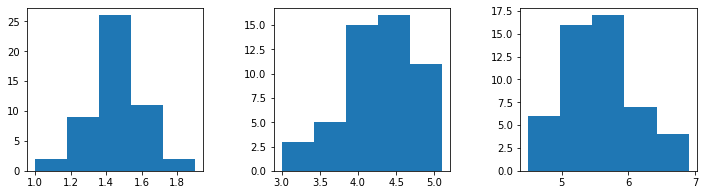

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.hist(setosadf["Petal.Length"], bins=5)
plt.subplot(1, 3, 2)
plt.hist(versicolordf["Petal.Length"], bins=5)
plt.subplot(1, 3, 3)
plt.hist(virginicadf["Petal.Length"], bins=5)
plt.subplots_adjust(wspace=0.4)
plt.show()

Now let's run the ANOVA test on the data. The statistic calculated for ANOVA is called the F-statistic.

In [27]:
f, p = sps.f_oneway(setosadf["Petal.Length"], versicolordf["Petal.Length"], virginicadf["Petal.Length"])
print("f-statistic: " + str(f) + "\np-value: " + str(p))

f-statistic: 1180.161182252981
p-value: 2.8567766109615584e-91


**Interpretation of the results:** Once again, the p-value is such that at any usual level of significance the hypothesis, which states that all the groups have been drawn from the same population, is rejected.

## Further information and reading

[15 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)